In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [100]:
faults = pd.read_csv('../data/J1939Faults.csv', 
                    usecols=['RecordID',
                             'EventTimeStamp',
                            'eventDescription',
                            'ecuSerialNumber',
                            'ecuSource',
                            'spn',
                            'fmi',
                            'active',
                            'activeTransitionCount',
                            'EquipmentID',
                            'Latitude',
                            'Longitude',
                            'LocationTimeStamp'
                            ])
faults['EventTimeStamp'] = pd.to_datetime(faults['EventTimeStamp'])
faults['LocationTimeStamp'] = pd.to_datetime(faults['LocationTimeStamp'])
diag = pd.read_csv('../data/VehicleDiagnosticOnboardData.csv')

In [101]:
vehicle = pd.read_excel('../data/Vehicle_Make.xlsx')
fault_code = pd.read_excel('../data/Service Fault Codes_1_0_0_167.xlsx')

/Users/chengxianzhang/anaconda3/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [143]:
diag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12821626 entries, 0 to 12821625
Data columns (total 4 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   Id       int64 
 1   Name     object
 2   Value    object
 3   FaultId  int64 
dtypes: int64(2), object(2)
memory usage: 391.3+ MB


In [102]:
fault_code[fault_code['SPN']==5246] 

,Published in CES 14602,Cummins Fault Code,Revision,PID,SID,MID,J1587 FMI,SPN,J1939 FMI,J2012 Pcode,Lamp Color,Lamp Device,Cummins Description,Algorithm Description
2518,Y,3712,167,Not Mapped,Not Mapped,Not Mapped,0,5246,0,Not Mapped,Red,Stop / Shutdown,Aftertreatment SCR Operator Inducement - Data ...,SCR inducement of 5 mph derate - Fault Code 41...
2781,Y,4134,167,Not Mapped,Not Mapped,Not Mapped,0,5246,15,Not Mapped,Amber,Warning,Aftertreatment SCR Operator Inducement - Data ...,SCR inducement - Least Severe - Fault Code 371...
4338,Y,6254,167,Not Mapped,Not Mapped,Not Mapped,0,5246,16,Not Mapped,Amber,Warning,Aftertreatment SCR Operator Inducement Severit...,NaN


In [103]:
diag

,Id,Name,Value,FaultId
0,1,IgnStatus,False,1
1,2,EngineOilPressure,0,1
2,3,EngineOilTemperature,96.74375,1
3,4,TurboBoostPressure,0,1
4,5,EngineLoad,11,1
...,...,...,...,...
12821621,12864020,EngineCoolantTemperature,181.4,1248457
12821622,12864021,ParkingBrake,False,1248457
12821623,12864022,SwitchedBatteryVoltage,14.1,1248457
12821624,12864023,DistanceLtd,28606.65625,1248457


In [104]:
faults[faults['spn']==5246].nunique()

RecordID                 1195
EventTimeStamp           1183
eventDescription            0
ecuSerialNumber           182
ecuSource                   2
spn                         1
fmi                         5
active                      2
activeTransitionCount      54
EquipmentID               224
Latitude                  852
Longitude                 855
LocationTimeStamp        1150
dtype: int64

In [105]:
faults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187335 entries, 0 to 1187334
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   RecordID               1187335 non-null  int64         
 1   EventTimeStamp         1187335 non-null  datetime64[ns]
 2   eventDescription       1126490 non-null  object        
 3   ecuSerialNumber        844318 non-null   object        
 4   ecuSource              1187335 non-null  int64         
 5   spn                    1187335 non-null  int64         
 6   fmi                    1187335 non-null  int64         
 7   active                 1187335 non-null  bool          
 8   activeTransitionCount  1187335 non-null  int64         
 9   EquipmentID            1187335 non-null  object        
 10  Latitude               1187335 non-null  float64       
 11  Longitude              1187335 non-null  float64       
 12  LocationTimeStamp      11873

In [106]:
derate = faults[faults['spn']==5246]

In [107]:
derate

,RecordID,EventTimeStamp,eventDescription,ecuSerialNumber,ecuSource,spn,fmi,active,activeTransitionCount,EquipmentID,Latitude,Longitude,LocationTimeStamp
45,46,2015-02-21 12:10:51,NaN,79464664,0,5246,0,True,1,1395,36.065972,-86.433425,2015-02-21 12:11:27
1918,1919,2015-02-22 19:44:55,NaN,79464664,0,5246,0,True,1,1395,36.066203,-86.434814,2015-02-22 19:46:27
2058,2059,2015-02-23 04:00:21,NaN,79464664,0,5246,0,False,1,1395,36.066666,-86.434537,2015-02-23 01:06:06
2089,2090,2015-02-23 05:05:44,NaN,79642446,0,5246,0,True,1,1630,40.733009,-74.087777,2015-02-23 05:08:23
2971,2972,2015-02-23 15:54:22,NaN,unknown,0,5246,0,True,1,1487,28.077361,-81.897083,2015-02-23 15:54:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183032,1244156,2020-02-19 07:02:33,NaN,79845785,0,5246,0,True,1,1814,36.067037,-86.434120,2020-02-19 07:03:09
1183684,1244808,2020-02-21 07:23:44,NaN,80092582,0,5246,16,True,1,2211,36.066296,-86.434305,2020-02-21 07:24:20
1184328,1245452,2020-02-24 15:28:05,NaN,80092582,0,5246,16,False,1,2211,36.066620,-86.434722,2020-02-24 15:28:01
1184330,1245454,2020-02-24 15:27:26,NaN,80092582,0,5246,0,True,1,2211,36.066620,-86.434722,2020-02-24 15:28:02


In [108]:
derate[derate['EquipmentID']=='1630']

,RecordID,EventTimeStamp,eventDescription,ecuSerialNumber,ecuSource,spn,fmi,active,activeTransitionCount,EquipmentID,Latitude,Longitude,LocationTimeStamp
2089,2090,2015-02-23 05:05:44,NaN,79642446,0,5246,0,True,1,1630,40.733009,-74.087777,2015-02-23 05:08:23


In [109]:
faults[faults['EquipmentID']=='1630']

,RecordID,EventTimeStamp,eventDescription,ecuSerialNumber,ecuSource,spn,fmi,active,activeTransitionCount,EquipmentID,Latitude,Longitude,LocationTimeStamp
66,67,2015-02-21 12:25:26,Low (Severity Medium) Engine Coolant Level,79642446,0,111,18,True,3,1630,35.587592,-86.443796,2015-02-21 12:27:08
67,68,2015-02-21 12:25:37,Low (Severity High) Engine Coolant Level,79642446,0,111,1,True,3,1630,35.587592,-86.443796,2015-02-21 12:27:08
68,69,2015-02-21 12:25:44,Abnormal Update Rate Tire Location,unknown,49,929,9,True,126,1630,35.587592,-86.443796,2015-02-21 12:27:09
80,81,2015-02-21 12:33:52,Abnormal Update Rate Tire Location,unknown,49,929,9,False,126,1630,35.586944,-86.443657,2015-02-21 12:33:48
82,83,2015-02-21 12:35:04,Low (Severity Medium) Engine Coolant Level,79642446,0,111,18,False,3,1630,35.586712,-86.443611,2015-02-21 12:35:00
83,84,2015-02-21 12:35:32,Low (Severity High) Engine Coolant Level,79642446,0,111,1,False,3,1630,35.586712,-86.443703,2015-02-21 12:35:28
116,117,2015-02-21 12:43:18,Abnormal Update Rate Tire Location,unknown,49,929,9,True,126,1630,35.801851,-86.398101,2015-02-21 13:06:20
159,160,2015-02-21 13:36:53,Abnormal Update Rate Tire Location,unknown,49,929,9,False,126,1630,36.066898,-86.441342,2015-02-21 13:36:48
167,168,2015-02-21 13:51:00,Low Voltage (Power Supply (obsolete)),unknown,11,627,4,True,127,1630,36.068796,-86.439722,2015-02-21 13:51:36
186,187,2015-02-21 14:03:17,Low Voltage (Power Supply (obsolete)),unknown,11,627,4,False,127,1630,36.068611,-86.439768,2015-02-21 14:03:12


In [110]:
derate['EventMonth'] = pd.DatetimeIndex(derate['EventTimeStamp']).month

/Users/chengxianzhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [111]:
derate['EventMonth'].value_counts()

2     164
1     123
11    116
5     109
12    108
4     106
7     100
8      87
6      85
3      74
10     65
9      58
Name: EventMonth, dtype: int64

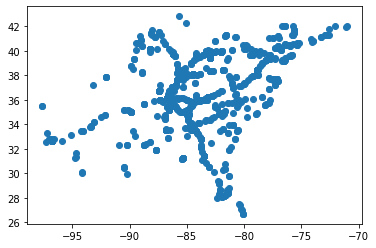

In [112]:
plt.scatter(derate['Longitude'], derate['Latitude'])

In [113]:
derate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1195 entries, 45 to 1185275
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RecordID               1195 non-null   int64         
 1   EventTimeStamp         1195 non-null   datetime64[ns]
 2   eventDescription       0 non-null      object        
 3   ecuSerialNumber        975 non-null    object        
 4   ecuSource              1195 non-null   int64         
 5   spn                    1195 non-null   int64         
 6   fmi                    1195 non-null   int64         
 7   active                 1195 non-null   bool          
 8   activeTransitionCount  1195 non-null   int64         
 9   EquipmentID            1195 non-null   object        
 10  Latitude               1195 non-null   float64       
 11  Longitude              1195 non-null   float64       
 12  LocationTimeStamp      1195 non-null   datetime64[ns]
 13 

In [114]:
vehicle

,Truck Number,Year,Make,Serial
0,535,1996,PETERBILT,1XPCDR8XXVN431011
1,534,1996,PETERBILT,1XPCPR8X8VN431010
2,533,1996,PETERBILT,1XPCDR8X1VN431009
3,532,1996,PETERBILT,1XPCDR8XXVN431008
4,531,1996,PETERBILT,1XPCDR8X8VN431007
...,...,...,...,...
195,713,2004,VOLVO,4V4NC9TG84N355473
196,714,2004,VOLVO,4V4NC9TGX4N355474
197,715,2004,VOLVO,4V4NC9TG14N355475
198,716,2004,VOLVO,4V4NC9TG34N355476


In [115]:
diag_pivoted = pd.pivot_table(diag, columns= ['Name'], values = 'Value', index = 'FaultId', aggfunc= 'first').reset_index()

In [116]:
diag_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187335 entries, 0 to 1187334
Data columns (total 25 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   FaultId                    1187335 non-null  int64 
 1   AcceleratorPedal           531889 non-null   object
 2   BarometricPressure         585976 non-null   object
 3   CruiseControlActive        574916 non-null   object
 4   CruiseControlSetSpeed      576458 non-null   object
 5   DistanceLtd                585819 non-null   object
 6   EngineCoolantTemperature   586071 non-null   object
 7   EngineLoad                 585621 non-null   object
 8   EngineOilPressure          586244 non-null   object
 9   EngineOilTemperature       583912 non-null   object
 10  EngineRpm                  586921 non-null   object
 11  EngineTimeLtd              581366 non-null   object
 12  FuelLevel                  502795 non-null   object
 13  FuelLtd                    

In [117]:
diag_pivoted

Name,FaultId,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,...,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
0,1,0,14.21,False,66.48672,423178.7,100.4,11,0,96.74375,...,NaN,False,78.8,1023,True,NaN,0,3276.75,NaN,0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,16639,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187330,1248454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
1187331,1248455,100,14.5,True,64.6226,423937.9,185,51,37.12,211.4937,...,32,True,98.6,18431,False,NaN,65.01096,NaN,73.2,7.83
1187332,1248456,0,14.355,True,66.48672,465925.4,186.8,62,41.18,212.8438,...,NaN,True,91.4,17407,NaN,NaN,66.5741,NaN,100,6.96
1187333,1248457,1.6,14.4275,False,67.72946,28606.65625,181.4,0,27.26,221.7312,...,NaN,True,100.4,1023,False,NaN,11.84489,14.1,100,1.74


In [118]:
faults

,RecordID,EventTimeStamp,eventDescription,ecuSerialNumber,ecuSource,spn,fmi,active,activeTransitionCount,EquipmentID,Latitude,Longitude,LocationTimeStamp
0,1,2015-02-21 10:47:13,Low (Severity Low) Engine Coolant Level,unknown,0,111,17,True,2,1439,38.857638,-84.626851,2015-02-21 11:34:25
1,2,2015-02-21 11:34:34,NaN,unknown,11,629,12,True,127,1439,38.857638,-84.626851,2015-02-21 11:35:10
2,3,2015-02-21 11:35:31,Incorrect Data Steering Wheel Angle,unknown,11,1807,2,False,127,1369,41.421250,-87.767361,2015-02-21 11:35:26
3,4,2015-02-21 11:35:33,Incorrect Data Steering Wheel Angle,unknown,11,1807,2,True,127,1369,41.421018,-87.767361,2015-02-21 11:36:08
4,5,2015-02-21 11:39:41,NaN,13063430,0,4364,17,False,2,1674,38.416481,-89.442638,2015-02-21 11:39:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187330,1248454,2020-03-06 14:00:26,Low (Severity Low) Catalyst Tank Level,80156139,0,1761,17,False,3,2282,37.094768,-85.897407,2020-03-06 14:00:21
1187331,1248455,2020-03-06 14:04:23,Condition Exists Engine Protection Torque Derate,79932020,0,1569,31,True,5,1994,34.390740,-79.461805,2020-03-06 14:04:59
1187332,1248456,2020-03-06 14:13:38,Abnormal Rate of Change Aftertreatment 1 Intak...,79880653,0,3216,10,True,1,1850,34.430370,-84.920509,2020-03-06 14:14:14
1187333,1248457,2020-03-06 14:14:13,Low (Severity Medium) Engine Coolant Level,NaN,0,111,18,True,8,2377,35.030925,-85.321527,2020-03-06 14:14:49


In [119]:
faults_diag = faults.merge(diag_pivoted, left_on = 'RecordID', right_on = 'FaultId')

In [120]:
derate = faults_diag[faults_diag['spn']==5246]

In [122]:
derate.nunique()

RecordID                     1195
EventTimeStamp               1183
eventDescription                0
ecuSerialNumber               182
ecuSource                       2
spn                             1
fmi                             5
active                          2
activeTransitionCount          54
EquipmentID                   224
Latitude                      852
Longitude                     855
LocationTimeStamp            1150
FaultId                      1195
AcceleratorPedal               68
BarometricPressure             25
CruiseControlActive             2
CruiseControlSetSpeed          31
DistanceLtd                   493
EngineCoolantTemperature       88
EngineLoad                     74
EngineOilPressure             113
EngineOilTemperature          405
EngineRpm                     345
EngineTimeLtd                 456
FuelLevel                     156
FuelLtd                       530
FuelRate                      220
FuelTemperature                68
IgnStatus     

In [123]:
from folium import plugins
from folium.plugins import HeatMap


map_hooray = folium.Map(location=[35.860119, -86.660156],
                    zoom_start = 5) 

heat_df = derate[['Latitude','Longitude']]

# List comprehension to make out list of lists
heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(map_hooray)

# Display the map
map_hooray

In [124]:
derated_truck_ID = derate['EquipmentID'].unique()

In [125]:
derated_truck_ID

array(['1395', '1630', '1487', '1329', '1419', '1486', '1509', '1492',
       '1473', 1383, 1396, 1602, 1431, 1795, 1595, 1366, 1339, 1391, 1399,
       1417, 1591, 1490, 1547, 1444, 1457, 105360462, 1696, 1437, 1453,
       1584, 1692, 105411041, 1590, 1398, 1418, 1472, 1560, 1572, 1375,
       1742, 1566, 1778, 1524, 305, 1659, 1403, 1535, 1567, 1373, 1665,
       1551, 1440, 1571, 1443, 1378, 1452, 1488, 1384, 304, 1582, 1508,
       1395, 1599, 1501, 1407, 1603, 1604, 1477, 1389, 1519, 1757, 1458,
       1401, 1467, 1579, 1534, 1575, 1539, 1601, 1419, 1657, 1592, 1563,
       1557, 1605, 1549, 1581, 301, 1811, 1573, 1594, 1668, 1643, 1561,
       1940, 1839, 1552, 1637, 1554, 1529, 1686, 1598, 1828, 1745, 1525,
       1848, 1537, 1521, 1661, 1831, 1528, 1654, 2011, 1917, 1543, 1812,
       1803, 1814, 1556, 1564, 1585, 1663, 1623, 1800, 1823, 1732, 1818,
       1746, 1586, 2009, 1946, 1749, 1559, 1711, 1630, 1600, 1939, 1704,
       1808, 1743, 1822, 1739, 1764, 1846, 2007, 1669, 1

In [126]:
derated_truck = faults_diag[faults_diag['EquipmentID'].isin(derated_truck_ID)]

In [127]:
# most common spn for derated trucks
derated_truck['spn'].value_counts()

# 111 Low (Severity Medium) Engine Coolant Level
# 929 Abnormal Update Rate Tire Location
# 96 High Voltage (Fuel Level)
# 829 High Voltage (Left Fuel Level Sensor)
# 639 Incorrect Data J1939 Network #1 Primary Vehicl...


111     172514
929      36795
96       25159
829      22784
639       6935
         ...  
5909         2
3663         1
3241         1
3521         1
934          1
Name: spn, Length: 335, dtype: int64

In [128]:
derated_truck[derated_truck['spn']==639]

,RecordID,EventTimeStamp,eventDescription,ecuSerialNumber,ecuSource,spn,fmi,active,activeTransitionCount,EquipmentID,...,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
5778,5779,2015-02-25 14:23:20,Incorrect Data J1939 Network #1 Primary Vehicl...,unknown,11,639,2,True,127,1621,...,32,True,95,1279,False,NaN,4.582613,3276.75,0,2.61
5807,5808,2015-02-25 14:45:09,Incorrect Data J1939 Network #1 Primary Vehicl...,unknown,11,639,2,False,127,1621,...,NaN,NaN,NaN,255,NaN,NaN,NaN,NaN,NaN,NaN
7110,7111,2015-03-03 13:28:53,Abnormal Update Rate J1939 Network #1 Primary ...,unknown,11,639,9,True,1,1486,...,NaN,True,60.8,1279,NaN,NaN,0,3276.75,NaN,0
7119,7120,2015-03-03 13:43:46,Abnormal Update Rate J1939 Network #1 Primary ...,unknown,11,639,9,False,1,1486,...,NaN,NaN,NaN,255,NaN,NaN,NaN,NaN,NaN,NaN
9030,9031,2015-03-14 17:48:15,Low Current J1939 Network #1 Primary Vehicle N...,unknown,11,639,5,True,1,1492,...,NaN,True,71.6,255,NaN,NaN,0,3276.75,NaN,2.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185363,1246487,2020-02-27 16:50:29,NaN,K1240376,3,639,12,False,22,2089,...,NaN,NaN,NaN,255,NaN,NaN,NaN,NaN,NaN,NaN
1186388,1247512,2020-03-03 15:34:13,NaN,K1240376,3,639,12,True,26,2089,...,NaN,True,129.2,255,NaN,NaN,0,13.05,100,0
1186389,1247513,2020-03-03 15:42:13,NaN,K1240376,3,639,12,False,26,2089,...,NaN,NaN,NaN,255,NaN,NaN,NaN,NaN,NaN,NaN
1187241,1248365,2020-03-06 09:23:24,Incorrect Data J1939 Network #1 Primary Vehicl...,unknown,11,639,2,True,127,2089,...,NaN,True,143.6,51199,True,NaN,0,12.7,100,0


In [137]:
derated_truck[derated_truck['EquipmentID']=='1395']

,RecordID,EventTimeStamp,eventDescription,ecuSerialNumber,ecuSource,spn,fmi,active,activeTransitionCount,EquipmentID,...,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
45,46,2015-02-21 12:10:51,NaN,79464664,0,5246,0,True,1,1395,...,NaN,True,NaN,22527,NaN,NaN,NaN,NaN,NaN,NaN
1916,1917,2015-02-22 19:44:55,Low Voltage (Aftertreatment 1 Outlet NOx),79464664,0,3226,4,True,1,1395,...,NaN,True,NaN,22527,NaN,NaN,NaN,NaN,NaN,NaN
1917,1918,2015-02-22 19:44:55,Condition Exists Engine Protection Torque Derate,79464664,0,1569,31,True,1,1395,...,NaN,True,NaN,22527,NaN,NaN,NaN,NaN,NaN,NaN
1918,1919,2015-02-22 19:44:55,NaN,79464664,0,5246,0,True,1,1395,...,NaN,True,NaN,22527,NaN,NaN,NaN,NaN,NaN,NaN
1919,1920,2015-02-22 19:44:55,Abnormal Rate of Change Aftertreatment 1 Outle...,79464664,0,3226,10,True,1,1395,...,NaN,True,NaN,22527,NaN,NaN,NaN,NaN,NaN,NaN
2054,2055,2015-02-23 03:58:26,Low Voltage (Aftertreatment 1 Outlet NOx),79464664,0,3226,4,False,1,1395,...,NaN,NaN,NaN,5119,NaN,NaN,NaN,NaN,NaN,NaN
2055,2056,2015-02-23 03:58:26,Abnormal Rate of Change Aftertreatment 1 Outle...,79464664,0,3226,10,False,1,1395,...,NaN,NaN,NaN,5119,NaN,NaN,NaN,NaN,NaN,NaN
2056,2057,2015-02-23 03:58:26,Condition Exists Engine Protection Torque Derate,79464664,0,1569,31,False,1,1395,...,NaN,NaN,NaN,5119,NaN,NaN,NaN,NaN,NaN,NaN
2058,2059,2015-02-23 04:00:21,NaN,79464664,0,5246,0,False,1,1395,...,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
30381,31493,2015-04-23 04:51:53,Low (Severity Low) Engine Coolant Level,79464664,0,111,17,True,1,1395,...,NaN,True,60.8,2035,NaN,NaN,7.980736,3276.75,NaN,3.19


In [141]:
derated_truck[derated_truck['EquipmentID']=='1630']

,RecordID,EventTimeStamp,eventDescription,ecuSerialNumber,ecuSource,spn,fmi,active,activeTransitionCount,EquipmentID,...,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
66,67,2015-02-21 12:25:26,Low (Severity Medium) Engine Coolant Level,79642446,0,111,18,True,3,1630,...,NaN,True,NaN,6143,NaN,NaN,NaN,NaN,NaN,NaN
67,68,2015-02-21 12:25:37,Low (Severity High) Engine Coolant Level,79642446,0,111,1,True,3,1630,...,32,True,42.8,6143,True,NaN,0,3276.75,0,0.58
68,69,2015-02-21 12:25:44,Abnormal Update Rate Tire Location,unknown,49,929,9,True,126,1630,...,32,True,42.8,1279,True,NaN,0,3276.75,0,0.58
80,81,2015-02-21 12:33:52,Abnormal Update Rate Tire Location,unknown,49,929,9,False,126,1630,...,NaN,NaN,NaN,255,NaN,NaN,NaN,NaN,NaN,NaN
82,83,2015-02-21 12:35:04,Low (Severity Medium) Engine Coolant Level,79642446,0,111,18,False,3,1630,...,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
83,84,2015-02-21 12:35:32,Low (Severity High) Engine Coolant Level,79642446,0,111,1,False,3,1630,...,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
116,117,2015-02-21 12:43:18,Abnormal Update Rate Tire Location,unknown,49,929,9,True,126,1630,...,32,True,64.4,1279,True,NaN,0,3276.75,0,0
159,160,2015-02-21 13:36:53,Abnormal Update Rate Tire Location,unknown,49,929,9,False,126,1630,...,NaN,NaN,NaN,255,NaN,NaN,NaN,NaN,NaN,NaN
167,168,2015-02-21 13:51:00,Low Voltage (Power Supply (obsolete)),unknown,11,627,4,True,127,1630,...,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
186,187,2015-02-21 14:03:17,Low Voltage (Power Supply (obsolete)),unknown,11,627,4,False,127,1630,...,NaN,NaN,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
derated_truck[derated_truck['EquipmentID']=='1487']

,RecordID,EventTimeStamp,eventDescription,ecuSerialNumber,ecuSource,spn,fmi,active,activeTransitionCount,EquipmentID,...,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
2216,2217,2015-02-23 07:15:48,NaN,unknown,0,4334,3,True,1,1487,...,NaN,True,114.8,18431,NaN,NaN,0,3276.75,NaN,4.64
2217,2218,2015-02-23 07:16:03,Condition Exists Engine Protection Torque Derate,unknown,0,1569,31,True,1,1487,...,NaN,True,113,18431,NaN,NaN,0,3276.75,NaN,2.61
2293,2294,2015-02-23 07:56:08,Condition Exists Catalyst Dosing Unit Input Lines,unknown,0,3362,31,True,1,1487,...,NaN,True,127.4,18431,NaN,NaN,0,3276.75,NaN,0.87
2395,2396,2015-02-23 09:16:02,Condition Exists Engine Protection Torque Derate,unknown,0,1569,31,False,1,1487,...,NaN,NaN,NaN,17407,NaN,NaN,NaN,NaN,NaN,NaN
2440,2441,2015-02-23 09:51:41,Condition Exists Engine Protection Torque Derate,unknown,0,1569,31,True,1,1487,...,NaN,True,134.6,18431,NaN,NaN,0,3276.75,NaN,1.16
2499,2500,2015-02-23 10:36:50,NaN,unknown,0,4334,16,True,1,1487,...,NaN,True,113,18431,NaN,NaN,5.737975,3276.75,NaN,0.87
2828,2829,2015-02-23 14:16:17,Low Voltage (Aftertreatment 1 Outlet NOx),unknown,0,3226,4,True,1,1487,...,NaN,True,118.4,18431,NaN,NaN,0,3276.75,NaN,0.87
2971,2972,2015-02-23 15:54:22,NaN,unknown,0,5246,0,True,1,1487,...,NaN,True,NaN,22527,NaN,NaN,NaN,NaN,NaN,NaN
2985,2986,2015-02-23 15:57:09,NaN,unknown,49,523531,31,True,1,1487,...,NaN,False,123.8,0,NaN,NaN,0,3276.75,NaN,2.03
2988,2989,2015-02-23 16:00:17,NaN,unknown,49,523531,31,False,1,1487,...,NaN,NaN,NaN,255,NaN,NaN,NaN,NaN,NaN,NaN
